In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [64]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

4


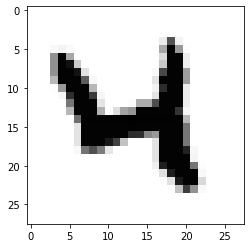

In [65]:
image_index=20
print(y_train[image_index])
plt.imshow(x_train[image_index],cmap="Greys")

In [66]:
x_train.shape

(60000, 28, 28)

In [67]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)

In [68]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [69]:
x_train/=255
x_test/=255

In [70]:
print(x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

(60000, 28, 28, 1)
60000
10000


In [71]:
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,Dropout,Flatten, MaxPooling2D
model=Sequential()

In [72]:
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [73]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x=x_train,y=y_train,epochs=4)

Epoch 1/4
60000/60000 [==============================] - 42s 706us/step - loss: 0.2133 - accuracy: 0.9361
Epoch 2/4
60000/60000 [==============================] - 42s 708us/step - loss: 0.0849 - accuracy: 0.9743
Epoch 3/4
60000/60000 [==============================] - 42s 700us/step - loss: 0.0594 - accuracy: 0.9810
Epoch 4/4
60000/60000 [==============================] - 42s 706us/step - loss: 0.0449 - accuracy: 0.9853


In [49]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 69us/step


[0.10366129584088922, 0.9692000150680542]

0


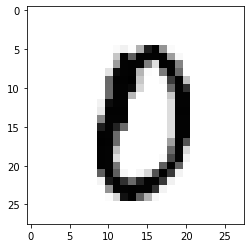

In [62]:
image_index=55
plt.imshow(x_test[image_index].reshape(28,28),cmap="Greys")
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())